<a href="https://colab.research.google.com/github/soham534/Random-Forest/blob/main/RandomForestbySohamBundela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor


# Importing the DataSet
Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

# EDA- Exploratory Data Analysis

In [ ]:
df.head( )

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Assigning Features and Targets

In [ ]:
x = np.array(df['Temperature'])
y = np.array(df['Revenue'])

# Splitting the Test and Train Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Model Selection

In [ ]:
regressor = RandomForestRegressor(n_estimators=10)

# Training the Model

In [ ]:
regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10)

# Testing the Model

In [ ]:
y_pred = regressor.predict(x_test.reshape(-1,1))

In [ ]:
pred = pd.DataFrame({'Actual':y_test.reshape(-1),'Predicted':y_pred.reshape(-1)})

In [ ]:
pred.head()

,Actual,Predicted
0,524.236115,537.990147
1,564.310532,601.966858
2,316.240194,295.940475
3,521.267379,518.074371
4,383.956240,392.421314


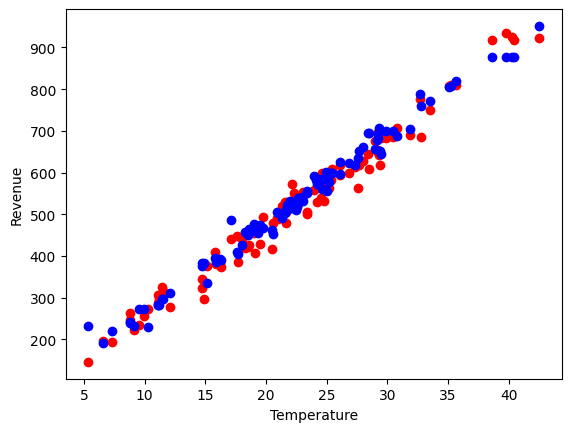

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='blue')
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.show()

<Axes: >

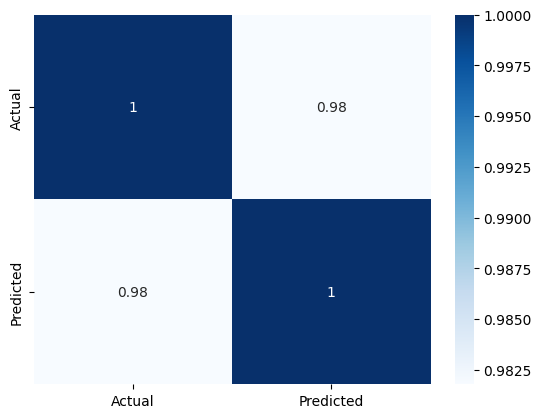

In [ ]:
sns.heatmap(pred.corr(),annot=True,cmap='Blues')

# Performance Tester

In [ ]:
r2_score(y_test,y_pred)

0.9608979715543553

In [ ]:
mean_squared_error(y_test,y_pred)

1173.4995066242986

In [ ]:
mean_absolute_error(y_test,y_pred)

28.050997748299995